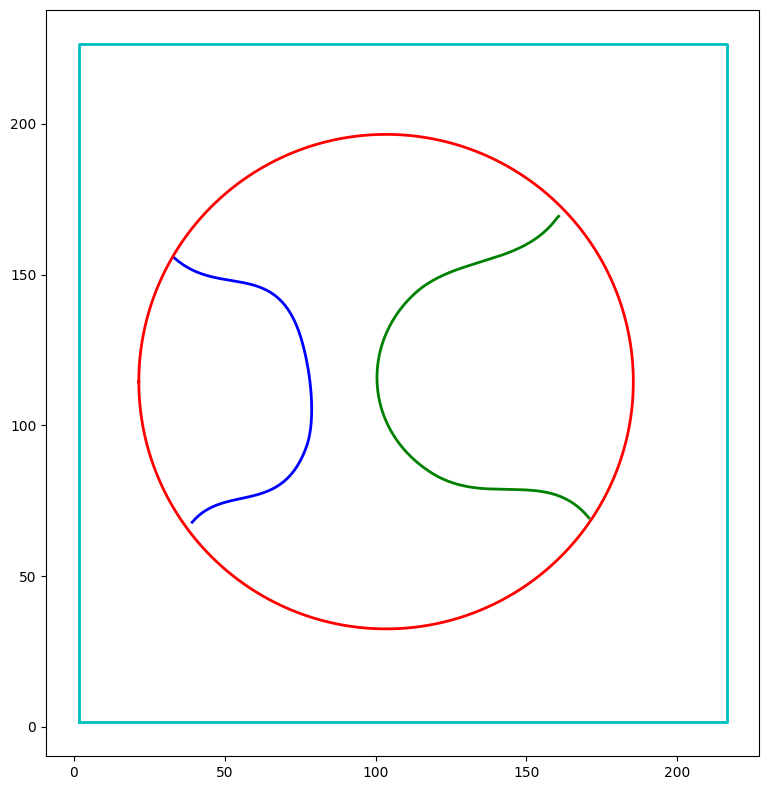

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define a list of colors
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()

def read_csv(csv_path):
    # Load data while ensuring it's properly delimited and handle missing data
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',', filling_values=np.nan)

    # Check if the loaded data has the expected number of dimensions
    if np_path_XYs.ndim == 1:
        raise ValueError("The CSV file does not have the expected structure.")

    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)

    return path_XYs

# Test the function with your CSV file
path_XYs = read_csv('frag01_sol.csv')
plot(path_XYs)


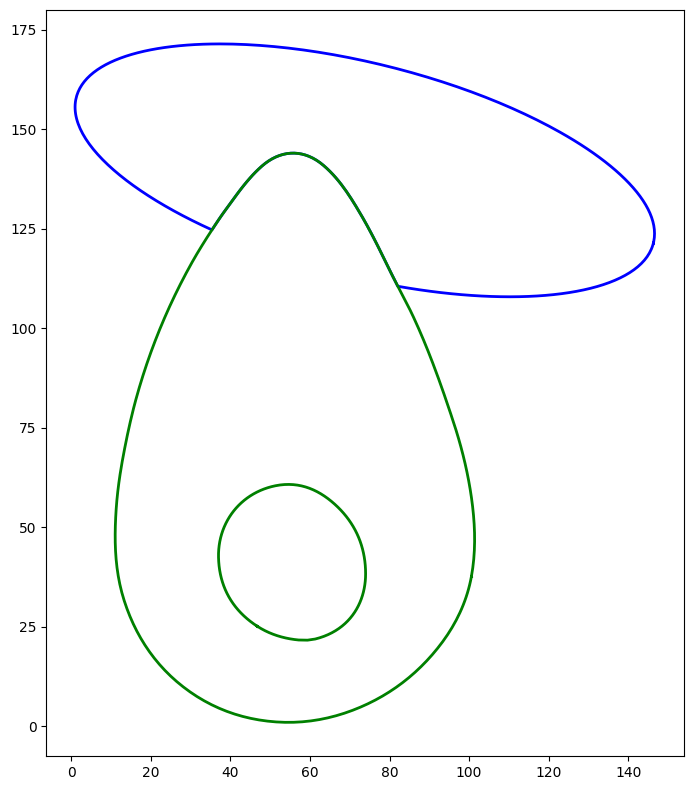

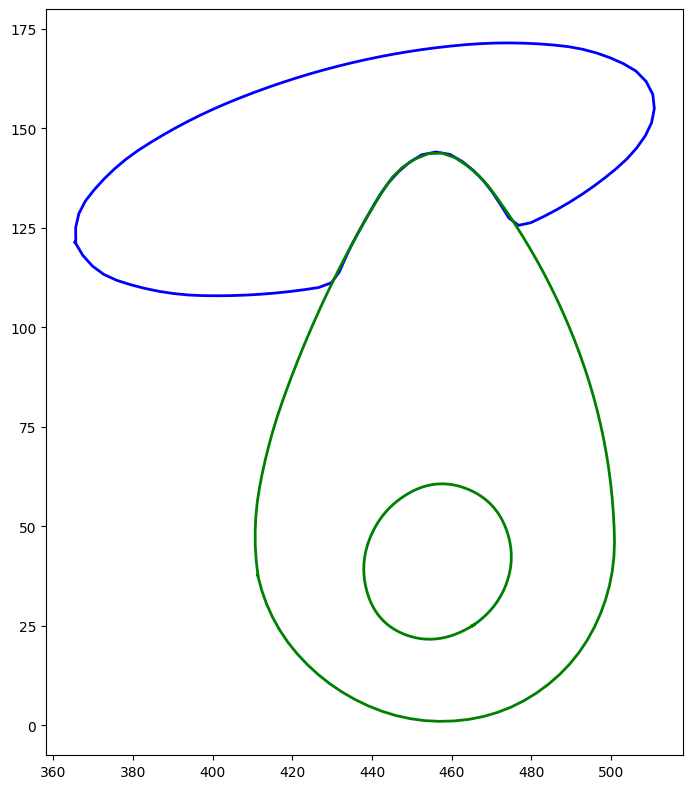

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def plot(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define a list of colors
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()

def read_csv(csv_path):
    # Load data while ensuring it's properly delimited and handle missing data
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',', filling_values=np.nan)

    # Check if the loaded data has the expected number of dimensions
    if np_path_XYs.ndim == 1:
        raise ValueError("The CSV file does not have the expected structure.")

    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)

    return path_XYs

def symmetrize_doodle(doodle):
    sym_doodle = doodle.copy()
    sym_doodle[:, 0] = 512 - sym_doodle[:, 0]
    return sym_doodle

def regularize_doodle(doodle):
    if len(doodle) < 2:
        return doodle

    try:
        tck, u = splprep([doodle[:, 0], doodle[:, 1]], s=3, k=2)
        unew = np.linspace(0, 1.0, num=100)
        out = splev(unew, tck)
        regular_doodle = np.vstack(out).T
        return regular_doodle
    except ValueError as e:
        print(f"Regularization failed: {e}")
        return doodle

def complete_curves(doodle):
    if not np.array_equal(doodle[0], doodle[-1]):
        completed_doodle = np.vstack([doodle, doodle[0]])
    else:
        completed_doodle = doodle
    return completed_doodle

def process_doodle(paths_XYs):
    processed_doodles = []

    for XYs in paths_XYs:
        processed_XYs = []
        for doodle in XYs:
            sym_doodle = symmetrize_doodle(doodle)
            regular_doodle = regularize_doodle(sym_doodle)
            completed_doodle = complete_curves(regular_doodle)
            processed_XYs.append(completed_doodle)
        processed_doodles.append(processed_XYs)

    return processed_doodles

# Use the provided read_csv function to load the data
csv_file_path = 'occlusion1.csv'  # Replace with your actual file path
paths_XYs = read_csv(csv_file_path)

# Process the doodles
processed_paths_XYs = process_doodle(paths_XYs)

# Plot the original and processed doodles
plot(paths_XYs)  # Original doodles
plot(processed_paths_XYs)  # Processed doodles
